Drive link: https://drive.google.com/drive/folders/1nqlc7Zz92M5mj2NKjwUTwC8hOt9GLlIn?usp=sharing

In [16]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm

class KDE:
    def __init__(self, kernel='gaussian', bandwidth=1.0):
        self.kernel = kernel
        self.bandwidth = bandwidth
        self.data = None
        
    def _kernel_function(self, u):
        if self.kernel == 'gaussian':
            return np.exp(-0.5 * np.sum(u**2, axis=-1)) / np.sqrt(2 * np.pi)
        elif self.kernel == 'triangular':
            return np.maximum(0, 1 - np.abs(u))
        elif self.kernel == 'uniform':
            return 0.5 * (np.abs(u) <= 1).astype(float)
        
    def fit(self, data, sample_size=5000):
        if len(data) > sample_size:
            indices = np.random.choice(len(data), sample_size, replace=False)
            self.data = data[indices]
        else:
            self.data = data
            
    def predict(self, samples):
        n, d = self.data.shape
        densities = np.zeros(len(samples))
        
        for i in tqdm(range(len(samples)), desc="Computing densities", leave=False):
            sample = samples[i]
            u = (sample - self.data) / self.bandwidth
            densities[i] = np.mean(self._kernel_function(u))
            
        return densities / (self.bandwidth ** d)

In [17]:
def load_and_preprocess(bg_path, test_path, resize=(400, 400)):
    bg_img = Image.open(bg_path).resize(resize)
    test_img = Image.open(test_path).resize(resize)
    
    bg_array = np.array(bg_img)
    test_array = np.array(test_img)
    
    return bg_array, test_array


def extract_features(image):
    h, w = image.shape[:2]
    features = image.reshape(-1, 3)
    return features


def foreground_detection(bg_array, test_array, kernel='gaussian', bandwidth=20.0, threshold_percentile=5):
    bg_features = extract_features(bg_array)
    test_features = extract_features(test_array)
    
    kde = KDE(kernel=kernel, bandwidth=bandwidth)
    kde.fit(bg_features, sample_size=40000)
    
    densities = kde.predict(test_features)
    
    threshold = np.percentile(densities, threshold_percentile)
    
    foreground_mask = (densities < threshold).reshape(test_array.shape[:2])
    
    return foreground_mask, densities


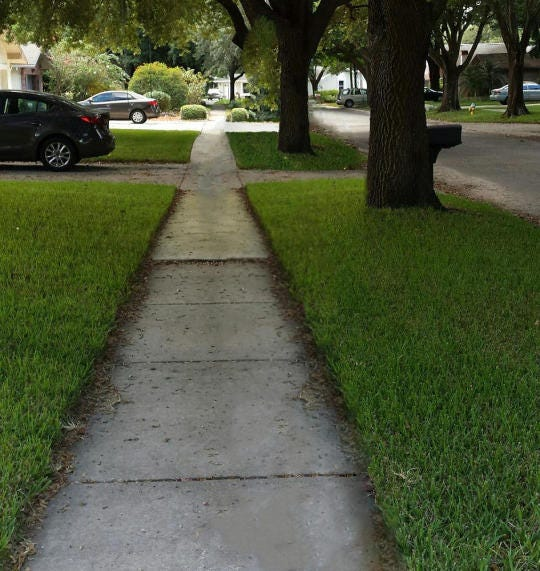

Background Image Size: (540, 571), Mode: RGB


In [18]:
back_img_path = 'Dataset/Q1/back.jpg'
test_img_path = 'Dataset/Q1/Full.jpg'

back_img = Image.open(back_img_path)
display(back_img)
print(f'Background Image Size: {back_img.size}, Mode: {back_img.mode}')

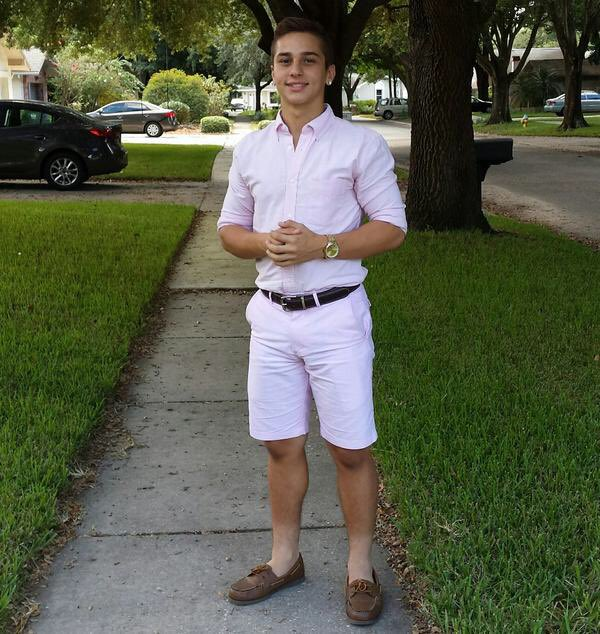

Background Image Size: (600, 634), Mode: RGB


In [19]:
test_img = Image.open(test_img_path)
display(test_img)
print(f'Background Image Size: {test_img.size}, Mode: {test_img.mode}')

Testing parameters: 100%|██████████| 15/15 [22:16<00:00, 89.11s/it]


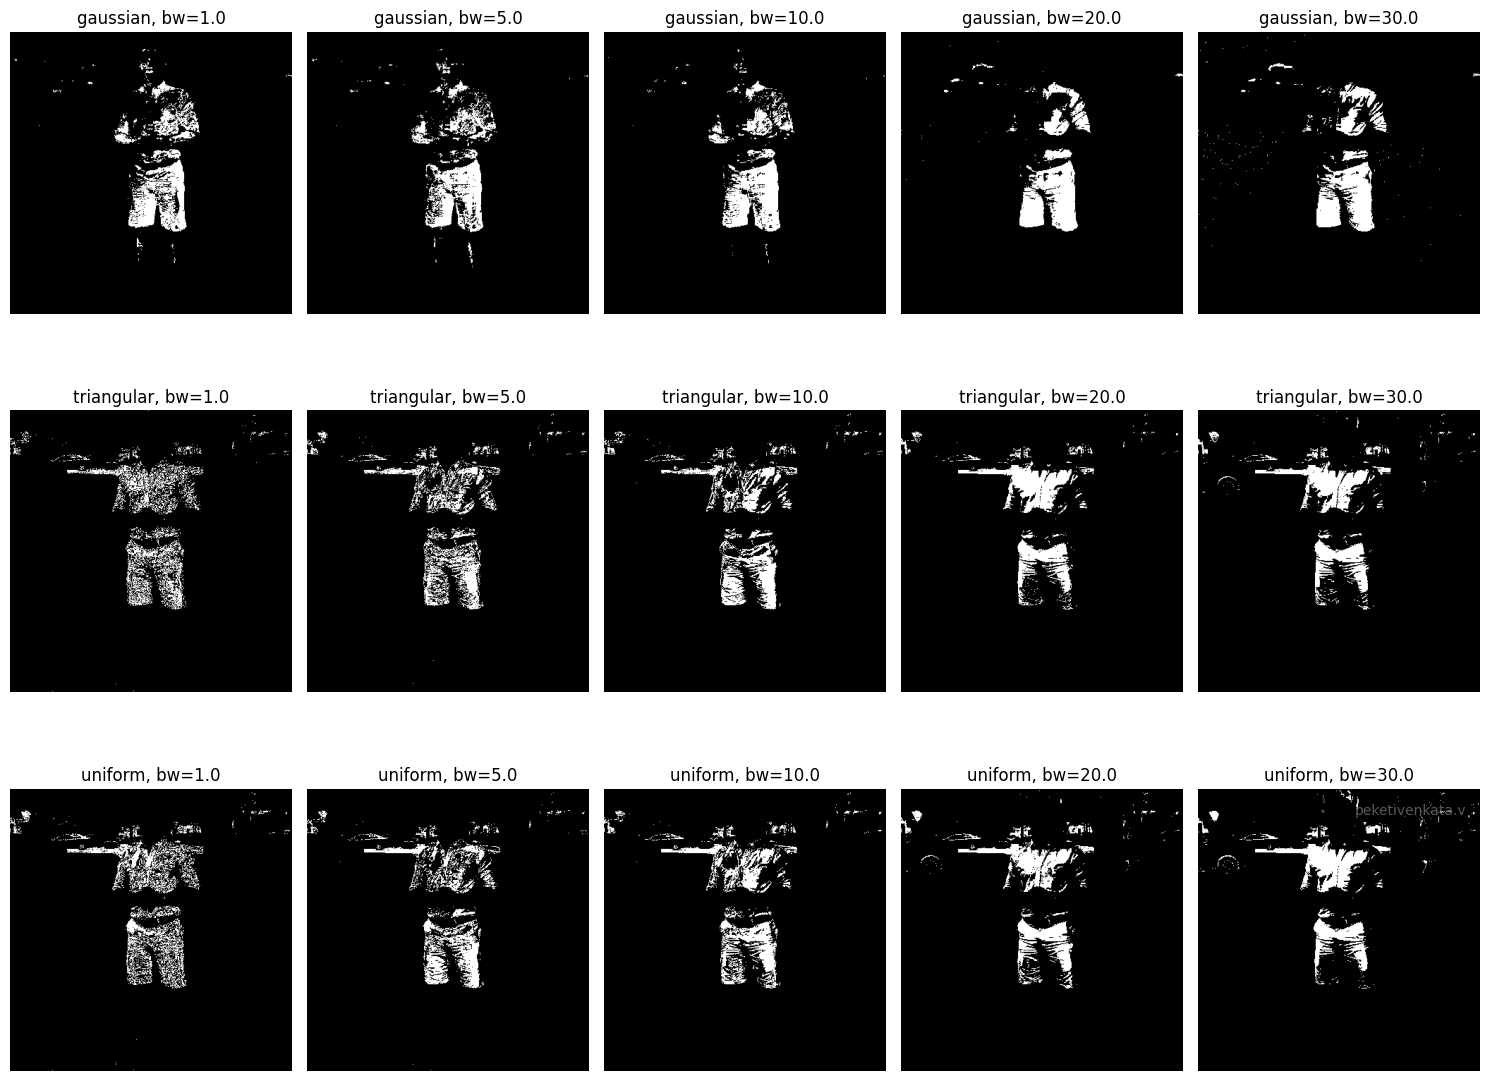

In [20]:
bg_array, test_array = load_and_preprocess(back_img_path, test_img_path, resize=(400, 400))

kernels = ['gaussian', 'triangular', 'uniform']
bandwidths = [1.0, 5.0, 10.0, 20.0, 30.0]

fig, axes = plt.subplots(len(kernels), len(bandwidths), figsize=(15, 12))

total_combinations = len(kernels) * len(bandwidths)
with tqdm(total=total_combinations, desc="Testing parameters") as pbar:
    for i, kernel in enumerate(kernels):
        for j, bandwidth in enumerate(bandwidths):
            foreground_mask, _ = foreground_detection(bg_array, test_array, 
                                                       kernel=kernel, 
                                                       bandwidth=bandwidth,
                                                       threshold_percentile=5)
            
            axes[i, j].imshow(foreground_mask, cmap='gray')
            axes[i, j].set_title(f'{kernel}, bw={bandwidth}')
            axes[i, j].axis('off')
            pbar.update(1)

plt.text(0.95, 0.95, "peketivenkata.v", ha='right', va='top',
         transform=plt.gca().transAxes, fontsize=10, color='gray', alpha=0.7)
plt.tight_layout()
plt.savefig('foreground_detection_results.png', dpi=150, bbox_inches='tight')
plt.show()

Testing parameters: 100%|██████████| 15/15 [21:17<00:00, 85.18s/it]


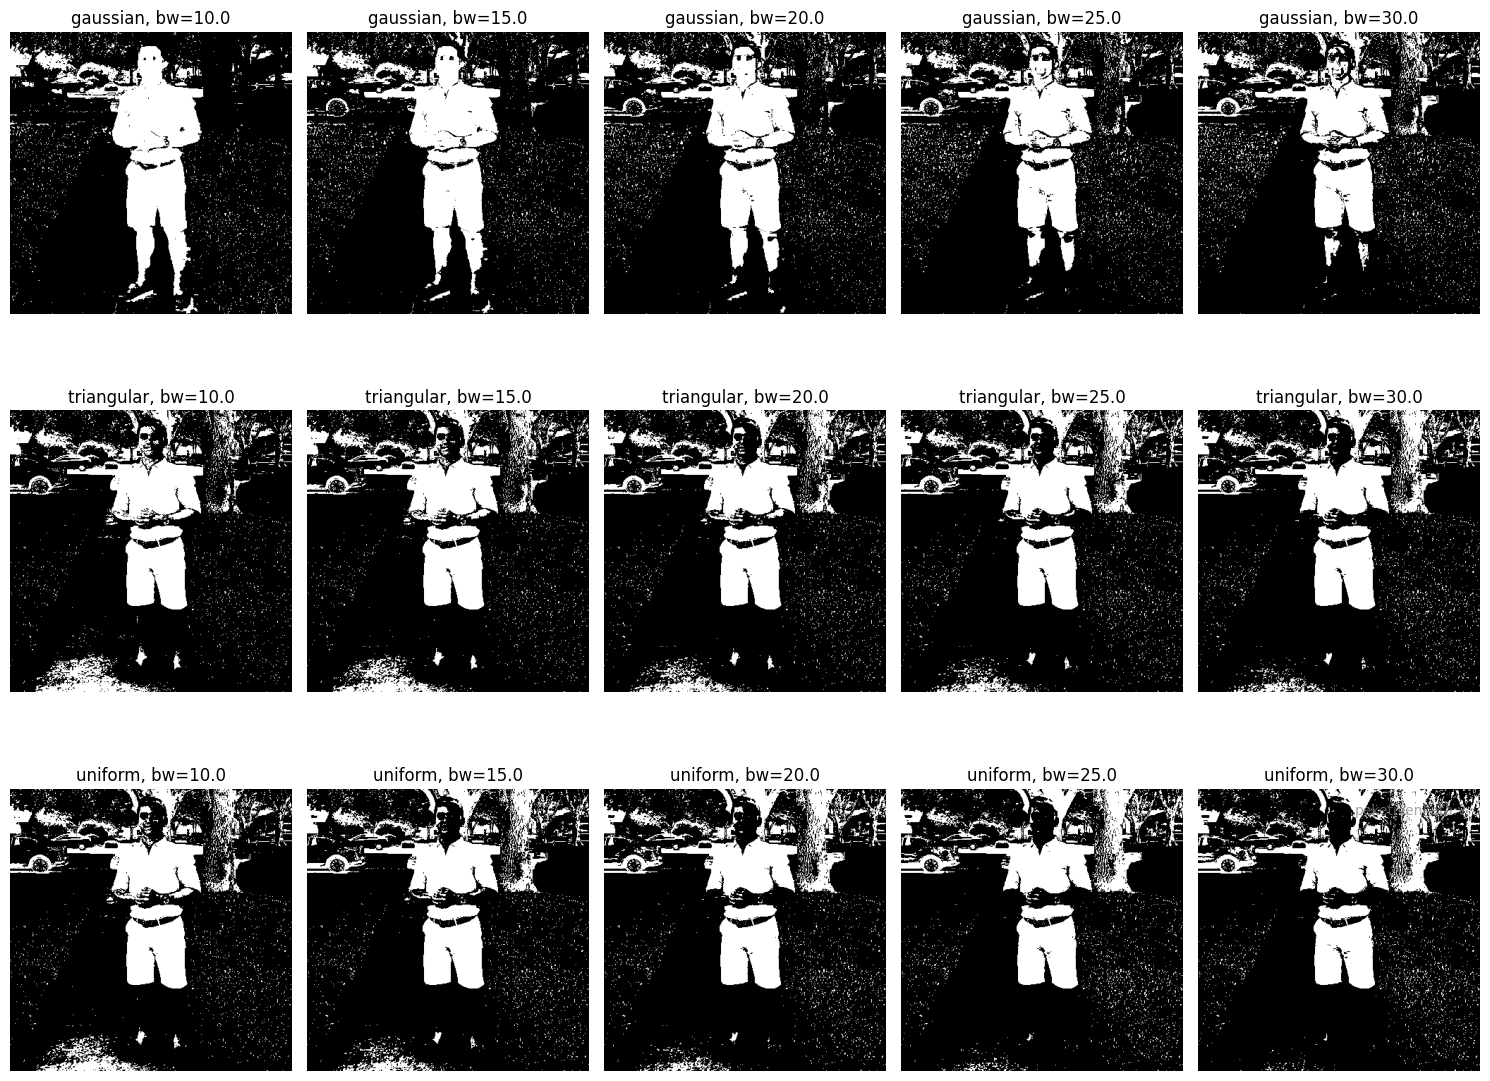

In [22]:
bg_array, test_array = load_and_preprocess(back_img_path, test_img_path, resize=(400, 400))

kernels = ['gaussian', 'triangular', 'uniform']
bandwidths = [10.0, 15.0, 20.0, 25.0, 30.0]

fig, axes = plt.subplots(len(kernels), len(bandwidths), figsize=(15, 12))

total_combinations = len(kernels) * len(bandwidths)
with tqdm(total=total_combinations, desc="Testing parameters") as pbar:
    for i, kernel in enumerate(kernels):
        for j, bandwidth in enumerate(bandwidths):
            foreground_mask, _ = foreground_detection(bg_array, test_array, 
                                                       kernel=kernel, 
                                                       bandwidth=bandwidth,
                                                       threshold_percentile=20)
            
            axes[i, j].imshow(foreground_mask, cmap='gray')
            axes[i, j].set_title(f'{kernel}, bw={bandwidth}')
            axes[i, j].axis('off')
            pbar.update(1)

plt.text(0.95, 0.95, "peketivenkata.v", ha='right', va='top',
         transform=plt.gca().transAxes, fontsize=10, color='gray', alpha=0.7)
plt.tight_layout()
plt.savefig('foreground_detection_results.png', dpi=150, bbox_inches='tight')
plt.show()

Testing parameters: 100%|██████████| 15/15 [21:46<00:00, 87.08s/it]


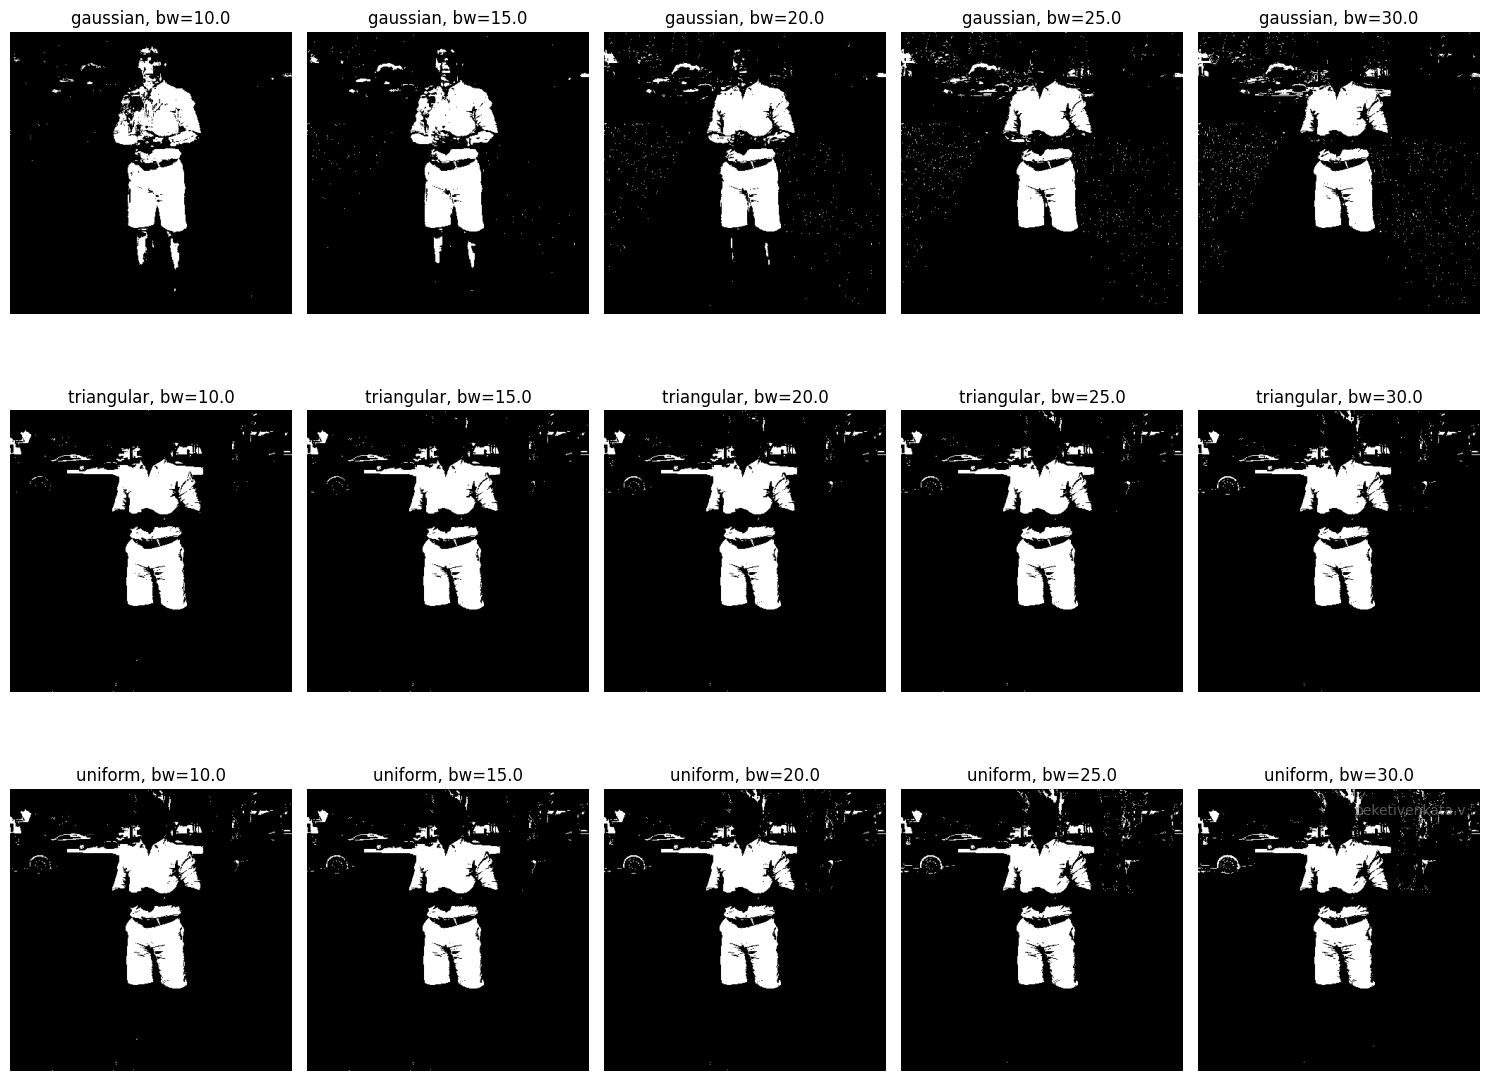

In [23]:
bg_array, test_array = load_and_preprocess(back_img_path, test_img_path, resize=(400, 400))

kernels = ['gaussian', 'triangular', 'uniform']
bandwidths = [10.0, 15.0, 20.0, 25.0, 30.0]

fig, axes = plt.subplots(len(kernels), len(bandwidths), figsize=(15, 12))

total_combinations = len(kernels) * len(bandwidths)
with tqdm(total=total_combinations, desc="Testing parameters") as pbar:
    for i, kernel in enumerate(kernels):
        for j, bandwidth in enumerate(bandwidths):
            foreground_mask, _ = foreground_detection(bg_array, test_array, 
                                                       kernel=kernel, 
                                                       bandwidth=bandwidth,
                                                       threshold_percentile=10)
            
            axes[i, j].imshow(foreground_mask, cmap='gray')
            axes[i, j].set_title(f'{kernel}, bw={bandwidth}')
            axes[i, j].axis('off')
            pbar.update(1)

plt.text(0.95, 0.95, "peketivenkata.v", ha='right', va='top',
         transform=plt.gca().transAxes, fontsize=10, color='gray', alpha=0.7)
plt.tight_layout()
plt.savefig('foreground_detection_results.png', dpi=150, bbox_inches='tight')
plt.show()

Testing parameters: 100%|██████████| 15/15 [22:44<00:00, 90.94s/it]


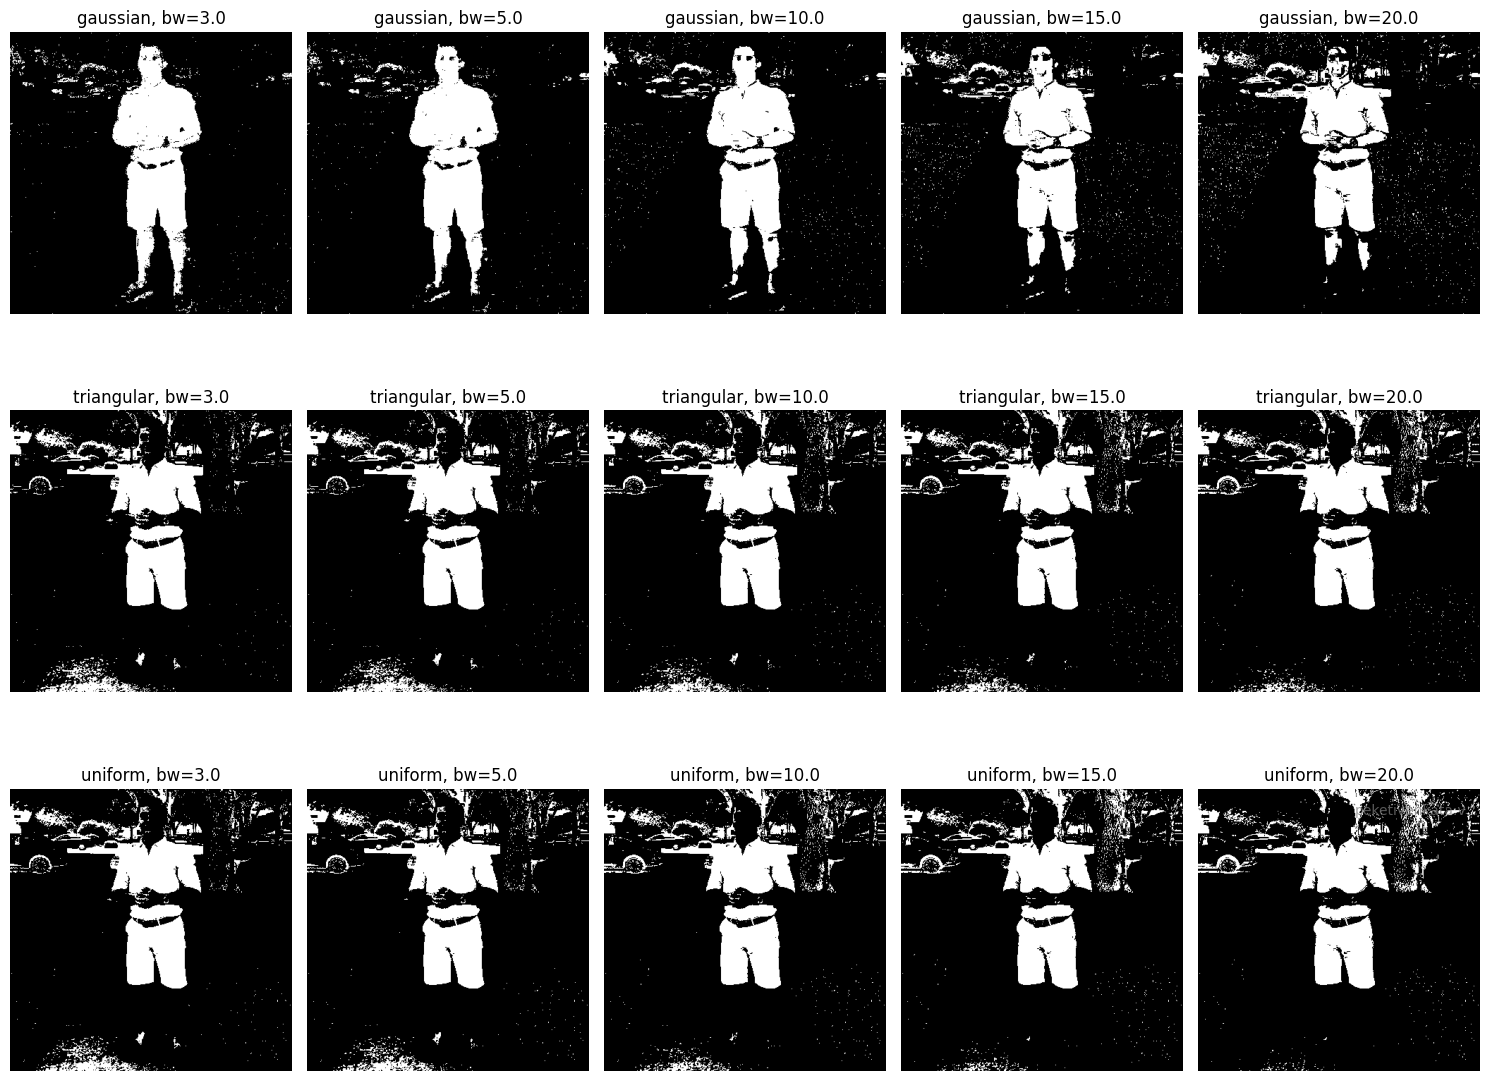

In [24]:
bg_array, test_array = load_and_preprocess(back_img_path, test_img_path, resize=(400, 400))

kernels = ['gaussian', 'triangular', 'uniform']
bandwidths = [3.0, 5.0, 10.0, 15.0, 20.0]

fig, axes = plt.subplots(len(kernels), len(bandwidths), figsize=(15, 12))

total_combinations = len(kernels) * len(bandwidths)
with tqdm(total=total_combinations, desc="Testing parameters") as pbar:
    for i, kernel in enumerate(kernels):
        for j, bandwidth in enumerate(bandwidths):
            foreground_mask, _ = foreground_detection(bg_array, test_array, 
                                                       kernel=kernel, 
                                                       bandwidth=bandwidth,
                                                       threshold_percentile=15)
            
            axes[i, j].imshow(foreground_mask, cmap='gray')
            axes[i, j].set_title(f'{kernel}, bw={bandwidth}')
            axes[i, j].axis('off')
            pbar.update(1)

plt.text(0.95, 0.95, "peketivenkata.v", ha='right', va='top',
         transform=plt.gca().transAxes, fontsize=10, color='gray', alpha=0.7)
plt.tight_layout()
plt.savefig('foreground_detection_results.png', dpi=150, bbox_inches='tight')
plt.show()

### Explanation for Best Parameter Combination

The best results were obtained using the **Gaussian kernel**, **bandwidth = 3–5**, **40,000 sampled background pixels**, and a **15% density threshold**. This combination performs well due to the following reasons:


#### **1. Gaussian kernel matches natural background variation**
The Gaussian kernel assigns smoothly decaying weights to nearby colors, unlike the sharp cutoffs of the uniform kernel or the linear decay of the triangular kernel. This makes it more suitable for modeling real-world pixel distributions, where colors form smooth, continuous clusters.

**Benefits:**
- Better separation between background and foreground  
- Fewer false positives in smooth background regions  

#### **2. Bandwidth 3–5 gives the ideal smoothing balance**
- **Too small (bw = 1)** - density estimate becomes too sharp overfits noise.
- **Too large (bw = 20 or 30)** - True foreground pixels are missed normal background variation gets misclassified as foreground.

**Bandwidth 3–5** provides a strong middle ground:


#### **3. Sampling 40,000 background points stabilizes KDE**
KDE is highly sensitive to sample size:

- **Too few points** leads to noisy and unstable density estimates   **Too many points** tends to slow and expensive computation.

Using **40,000 points**:
- Captures full color diversity of the background  
- Prevents noisy density estimates  
- Keeps computation manageable  

#### **4. 15% density threshold gives accurate foreground masks**
- **5% threshold** - too strict, misses parts of the foreground  
- **20% threshold** - too loose, includes background noise  



